# Final Comparison: GAN vs AE/DEC vs GNN-GAE
This notebook loads saved outputs from the three model notebooks and compares metrics and visualizations.

In [1]:
import os, json, numpy as np, matplotlib.pyplot as plt
from nb_utils import plot_tsne
BASES = {
    'GAN': '../results_gan',
    'AE_DEC': '../results_ae',
    'GNN_GAE': '../results_gnn',
}
names = {
    'GAN': 'gan',
    'AE_DEC': 'ae_dec',
    'GNN_GAE': 'gnn_gae',
}
rows = []
for k, b in BASES.items():
    mpath = os.path.join(b, f"{names[k]}_metrics.json")
    if os.path.exists(mpath):
        with open(mpath, 'r') as f:
            m = json.load(f)
        rows.append((k, m.get('silhouette', None), m.get('davies_bouldin', None)))
rows

[('GAN', -0.011552253738045692, 2.6675071931160756),
 ('AE_DEC', 0.16109798848628998, 2.1736449511028555),
 ('GNN_GAE', -0.09444788098335266, 1.7607125706634286)]

### Tabulate metrics

In [2]:
import pandas as pd
df = pd.DataFrame(rows, columns=['Model', 'Silhouette', 'Davies-Bouldin'])
df.sort_values('Silhouette', ascending=False, inplace=True)
df

,Model,Silhouette,Davies-Bouldin
1,AE_DEC,0.161098,2.173645
0,GAN,-0.011552,2.667507
2,GNN_GAE,-0.094448,1.760713


### Bar charts of metrics

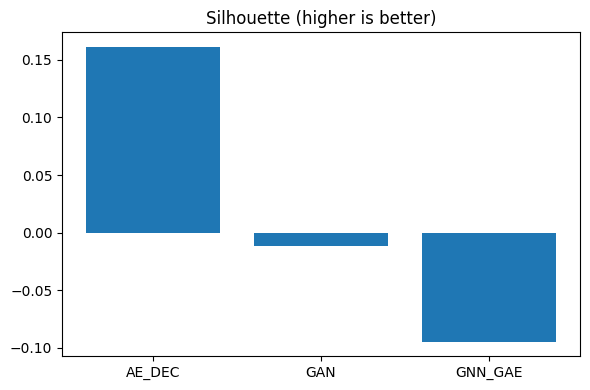

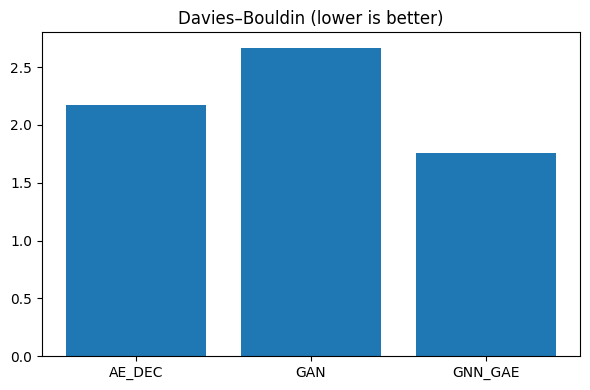

In [3]:
plt.figure(figsize=(6,4)); plt.bar(df['Model'], df['Silhouette']); plt.title('Silhouette (higher is better)'); plt.tight_layout(); plt.show()
plt.figure(figsize=(6,4)); plt.bar(df['Model'], df['Davies-Bouldin']); plt.title('Davies–Bouldin (lower is better)'); plt.tight_layout(); plt.show()

### (Optional) Overlay 2D plots
If you want to re-plot t-SNE using the same random seed, re-run t-SNE on the original X and color by each model's labels.